0
Plotting points [0, np.float64(1.0)], [0, np.float64(0.0)]
1.5707963267948966
Plotting points [np.float64(1.0), np.float64(1.0)], [np.float64(0.0), np.float64(1.0)]


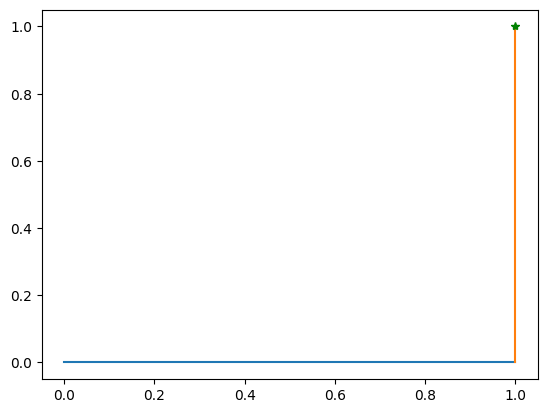

In [1]:
from Arm import Arm
from Simulation import Simulation
import matplotlib.pyplot as plt
import numpy as np

arm = Arm((0, 0))
arm.add_linkeage(0, 1)
arm.add_linkeage(np.pi /2, 1)

sim = Simulation((1, 1), arm)
sim.draw(plt)

plt.show()
